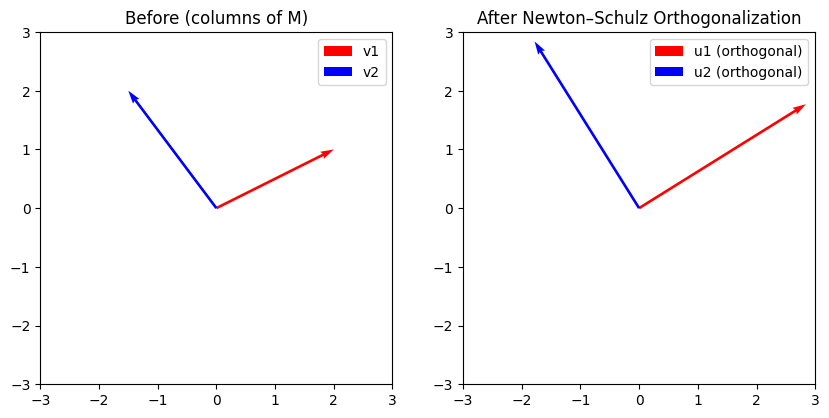

U^T U ≈
 [[11.1952 -0.0295]
 [-0.0295 11.2321]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_schulz_orthogonalize(M, num_iters=5):
    # Scale to improve convergence (normalize Frobenius norm)
    normM = np.linalg.norm(M, 'fro')
    M_scaled = M / normM

    X = M_scaled.copy()
    for _ in range(num_iters):
        X = 0.5 * X @ (3 * np.eye(M.shape[1]) - X.T @ X)

    # Rescale back
    return X * normM

# Create a 2D example: matrix with 2 column vectors in R^2
M = np.array([[2.0, -1.5],
              [1.0, 2.0]])

# Orthogonalize using Newton-Schulz with scaling
U = newton_schulz_orthogonalize(M, num_iters=3)

# Extract columns as vectors
v1, v2 = M[:, 0], M[:, 1]
u1, u2 = U[:, 0], U[:, 1]

# Plot before and after
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before orthogonalization
axes[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
axes[0].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
axes[0].set_xlim(-3, 3)
axes[0].set_ylim(-3, 3)
axes[0].set_aspect('equal')
axes[0].set_title("Before (columns of M)")
axes[0].legend()

# After orthogonalization
axes[1].quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='r', label='u1 (orthogonal)')
axes[1].quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1, color='b', label='u2 (orthogonal)')
axes[1].set_xlim(-3, 3)
axes[1].set_ylim(-3, 3)
axes[1].set_aspect('equal')
axes[1].set_title("After Newton–Schulz Orthogonalization")
axes[1].legend()

plt.show()

# Check orthogonality numerically
print("U^T U ≈\n", np.round(U.T @ U, 4))

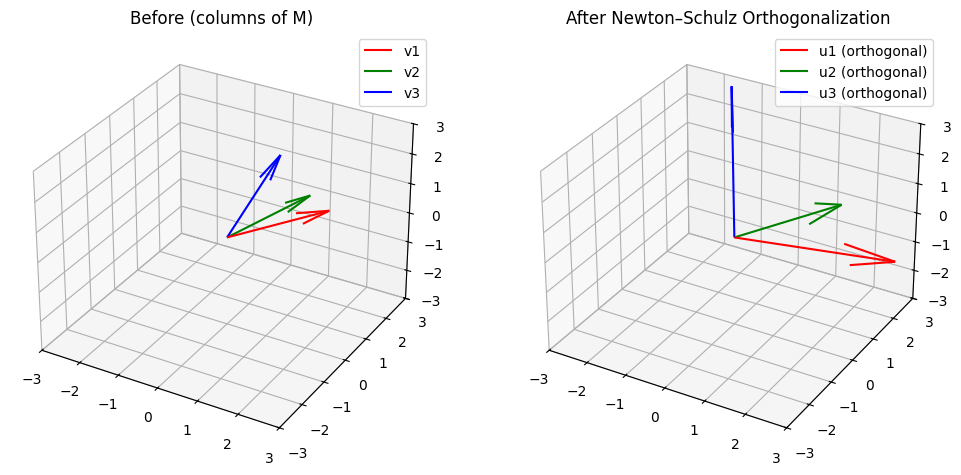

U^T U ≈
 [[17.75  0.    0.  ]
 [ 0.   17.75 -0.  ]
 [ 0.   -0.   17.75]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def newton_schulz_orthogonalize(M, num_iters=10):
    # Scale to improve convergence (normalize Frobenius norm)
    normM = np.linalg.norm(M, 'fro')
    M_scaled = M / normM

    X = M_scaled.copy()
    for _ in range(num_iters):
        X = 0.5 * X @ (3 * np.eye(M.shape[1]) - X.T @ X)

    # Rescale back
    return X * normM

# Create a 3D example: matrix with 3 column vectors in R^3
M = np.array([[2.0, 1.0, 0.5],
              [1.0, 2.0, 1.5],
              [1.0, 0.5, 2.0]])

# Orthogonalize using Newton-Schulz with scaling
U = newton_schulz_orthogonalize(M, num_iters=20)

# Extract columns as vectors
v = [M[:, i] for i in range(3)]
u = [U[:, i] for i in range(3)]

# Plot before and after in 3D
fig = plt.figure(figsize=(12, 6))

# Before
ax1 = fig.add_subplot(121, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    ax1.quiver(0, 0, 0, v[i][0], v[i][1], v[i][2], color=colors[i], label=f'v{i+1}')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_title("Before (columns of M)")
ax1.legend()

# After
ax2 = fig.add_subplot(122, projection='3d')
for i in range(3):
    ax2.quiver(0, 0, 0, u[i][0], u[i][1], u[i][2], color=colors[i], label=f'u{i+1} (orthogonal)')
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_title("After Newton–Schulz Orthogonalization")
ax2.legend()

plt.show()

# Check orthogonality numerically
print("U^T U ≈\n", np.round(U.T @ U, 4))


In [ ]:
import numpy as np
import plotly.graph_objects as go

def newton_schulz_orthogonalize(M, num_iters=10):
    # Scale to improve convergence (normalize Frobenius norm)
    normM = np.linalg.norm(M, 'fro')
    M_scaled = M / normM

    X = M_scaled.copy()
    for _ in range(num_iters):
        X = 0.5 * X @ (3 * np.eye(M.shape[1]) - X.T @ X)

    # Rescale back
    return X * normM

# Create a 3D example: matrix with 3 column vectors in R^3
M = np.array([[10.0, 1.0, 0.5],
              [5.0, 2.0, 1.5],
              [5.0, 0.5, 2.0]])

# Orthogonalize using Newton-Schulz with scaling
U = newton_schulz_orthogonalize(M, num_iters=5)

# Extract columns as vectors
v = [M[:, i] for i in range(3)]
u = [U[:, i] for i in range(3)]
colors = ['red', 'green', 'blue']

# Create interactive figure
fig = go.Figure()

# Original vectors
for i in range(3):
    fig.add_trace(go.Cone(
        x=[0], y=[0], z=[0],
        u=[v[i][0]], v=[v[i][1]], w=[v[i][2]],
        colorscale=[[0, colors[i]], [1, colors[i]]],
        sizemode="absolute", # sizeref=0.2,  # much smaller cones
        anchor="tail",
        name=f'v{i+1} (before)'
    ))

# Orthogonalized vectors
for i in range(3):
    fig.add_trace(go.Cone(
        x=[0], y=[0], z=[0],
        u=[u[i][0]], v=[u[i][1]], w=[u[i][2]],
        colorscale=[[0, colors[i]], [1, colors[i]]],
        sizemode="absolute", # sizeref=0.2,
        anchor="tail",
        opacity=0.5,
        name=f'u{i+1} (after)'
    ))

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-3, 3]),
        yaxis=dict(range=[-3, 3]),
        zaxis=dict(range=[-3, 3]),
        aspectmode="cube"
    ),
    title="Interactive 3D Newton–Schulz Orthogonalization",
    legend=dict(x=0.7, y=0.9)
)

fig.show()

# Check orthogonality numerically
print("U^T U ≈\n", np.round(U.T @ U, 4))


U^T U ≈
 [[159.502    9.5245   5.1336]
 [  9.5245  72.4096  26.8449]
 [  5.1336  26.8449 101.8208]]


In [ ]:
import numpy as np

a = np.array([[1,1],
            [2,2]
              ])

In [ ]:
a

array([[1, 1],
       [2, 2]])